In [1]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('722_Iteration_4').getOrCreate()

# Import the relevant Python libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pyspark.sql.functions import mean, stddev, skewness, kurtosis

In [2]:
# Use Spark to read in the Ecommerce Customers csv file. 
life= spark.read.csv("Life Expectancy Data.csv",inferSchema=True,header=True)
life1=pd.read_csv("Life Expectancy Data.csv")

In [3]:
life.printSchema()
life.head()

root
 |-- Country: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Status: string (nullable = true)
 |-- Life expectancy : double (nullable = true)
 |-- Adult Mortality: integer (nullable = true)
 |-- infant deaths: integer (nullable = true)
 |-- Alcohol: double (nullable = true)
 |-- percentage expenditure: double (nullable = true)
 |-- Measles : integer (nullable = true)
 |--  BMI : double (nullable = true)
 |-- under-five deaths : integer (nullable = true)
 |-- Polio: integer (nullable = true)
 |-- Total expenditure: double (nullable = true)
 |-- Diphtheria : integer (nullable = true)
 |--  HIV/AIDS: double (nullable = true)
 |--  thinness  1-19 years: double (nullable = true)
 |--  thinness 5-9 years: double (nullable = true)
 |-- Income composition of resources: double (nullable = true)
 |-- Schooling: double (nullable = true)



Row(Country='Afghanistan', Year=2015, Status='Developing', Life expectancy =65.0, Adult Mortality=263, infant deaths=62, Alcohol=0.01, percentage expenditure=71.27962362, Measles =1154,  BMI =19.1, under-five deaths =83, Polio=6, Total expenditure=8.16, Diphtheria =65,  HIV/AIDS=0.1,  thinness  1-19 years=17.2,  thinness 5-9 years=17.3, Income composition of resources=0.479, Schooling=10.1)

In [4]:
life.dtypes

[('Country', 'string'),
 ('Year', 'int'),
 ('Status', 'string'),
 ('Life expectancy ', 'double'),
 ('Adult Mortality', 'int'),
 ('infant deaths', 'int'),
 ('Alcohol', 'double'),
 ('percentage expenditure', 'double'),
 ('Measles ', 'int'),
 (' BMI ', 'double'),
 ('under-five deaths ', 'int'),
 ('Polio', 'int'),
 ('Total expenditure', 'double'),
 ('Diphtheria ', 'int'),
 (' HIV/AIDS', 'double'),
 (' thinness  1-19 years', 'double'),
 (' thinness 5-9 years', 'double'),
 ('Income composition of resources', 'double'),
 ('Schooling', 'double')]

In [5]:
life.count()

2938

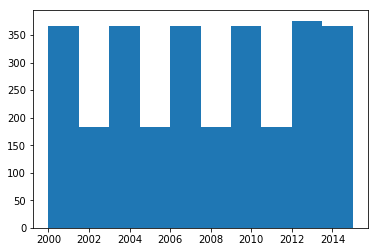

In [6]:
plt.hist(np.array(life.select('year').collect()))
plt.show()

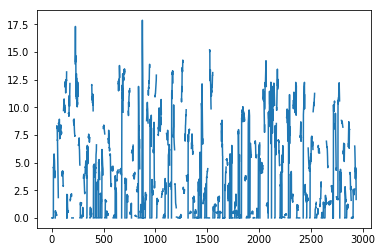

In [7]:
plt.plot(np.array(life.select('Alcohol').collect()))
plt.show()

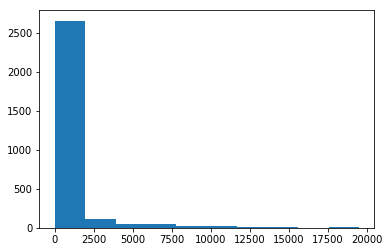

In [8]:
plt.hist(np.array(life.select('percentage expenditure').collect()))
plt.show()

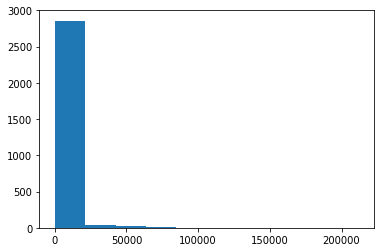

In [9]:
plt.hist(np.array(life.select('Measles ').collect()))
plt.show()

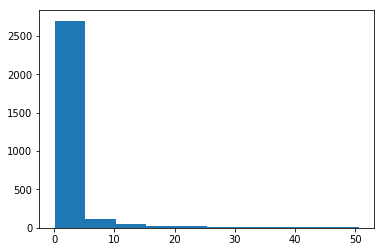

In [10]:
plt.hist(np.array(life.select(' HIV/AIDS').collect()))
plt.show()

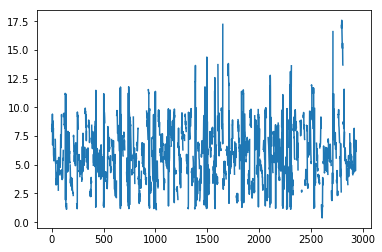

In [11]:
plt.plot(np.array(life.select('Total expenditure').collect()))
plt.show()

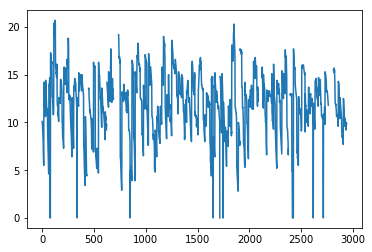

In [12]:
plt.plot(np.array(life.select('Schooling').collect()))
plt.show()

In [13]:
life.show()

+-----------+----+----------+----------------+---------------+-------------+-------+----------------------+--------+-----+------------------+-----+-----------------+-----------+---------+---------------------+-------------------+-------------------------------+---------+
|    Country|Year|    Status|Life expectancy |Adult Mortality|infant deaths|Alcohol|percentage expenditure|Measles | BMI |under-five deaths |Polio|Total expenditure|Diphtheria | HIV/AIDS| thinness  1-19 years| thinness 5-9 years|Income composition of resources|Schooling|
+-----------+----+----------+----------------+---------------+-------------+-------+----------------------+--------+-----+------------------+-----+-----------------+-----------+---------+---------------------+-------------------+-------------------------------+---------+
|Afghanistan|2015|Developing|            65.0|            263|           62|   0.01|           71.27962362|    1154| 19.1|                83|    6|             8.16|         65|      0

In [14]:
import pyspark.sql.functions as f
from functools import reduce

null_f=life.where(reduce(lambda x, y: x | y, (f.col(x).isNull() for x in life.columns)))
null_f.show()

+--------------------+----+----------+----------------+---------------+-------------+-------+----------------------+--------+-----+------------------+-----+-----------------+-----------+---------+---------------------+-------------------+-------------------------------+---------+
|             Country|Year|    Status|Life expectancy |Adult Mortality|infant deaths|Alcohol|percentage expenditure|Measles | BMI |under-five deaths |Polio|Total expenditure|Diphtheria | HIV/AIDS| thinness  1-19 years| thinness 5-9 years|Income composition of resources|Schooling|
+--------------------+----+----------+----------------+---------------+-------------+-------+----------------------+--------+-----+------------------+-----+-----------------+-----------+---------+---------------------+-------------------+-------------------------------+---------+
|             Algeria|2015|Developing|            75.6|             19|           21|   null|                   0.0|      63| 59.5|                24|   95| 

In [15]:
print('There are complete fields is %.4f ' %((life.count()-null_f.count())/life.count()))


There are complete fields is 0.8700 


In [16]:

life1.skew()

Year                              -0.006409
Life expectancy                   -0.638605
Adult Mortality                    1.174369
infant deaths                      9.786963
Alcohol                            0.589563
percentage expenditure             4.652051
Measles                            9.441332
 BMI                              -0.219312
under-five deaths                  9.495065
Polio                             -2.098053
Total expenditure                  0.618686
Diphtheria                        -2.072753
 HIV/AIDS                          5.396112
 thinness  1-19 years              1.711471
 thinness 5-9 years                1.777424
Income composition of resources   -1.143763
Schooling                         -0.602437
dtype: float64

In [17]:
life=life.drop('Income composition of resources')
life.dtypes

[('Country', 'string'),
 ('Year', 'int'),
 ('Status', 'string'),
 ('Life expectancy ', 'double'),
 ('Adult Mortality', 'int'),
 ('infant deaths', 'int'),
 ('Alcohol', 'double'),
 ('percentage expenditure', 'double'),
 ('Measles ', 'int'),
 (' BMI ', 'double'),
 ('under-five deaths ', 'int'),
 ('Polio', 'int'),
 ('Total expenditure', 'double'),
 ('Diphtheria ', 'int'),
 (' HIV/AIDS', 'double'),
 (' thinness  1-19 years', 'double'),
 (' thinness 5-9 years', 'double'),
 ('Schooling', 'double')]

In [18]:
len(life.columns)

18

In [19]:
life.describe().show()

+-------+-----------+------------------+----------+-----------------+------------------+------------------+------------------+----------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+---------------------+-------------------+------------------+
|summary|    Country|              Year|    Status| Life expectancy |   Adult Mortality|     infant deaths|           Alcohol|percentage expenditure|          Measles |              BMI |under-five deaths |             Polio| Total expenditure|      Diphtheria |          HIV/AIDS| thinness  1-19 years| thinness 5-9 years|         Schooling|
+-------+-----------+------------------+----------+-----------------+------------------+------------------+------------------+----------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+---------------------+-----------

In [20]:
life=life.na.drop()

In [21]:
life.count()

2556

In [22]:
life_value=life.drop('Country','Year','Status')


In [23]:
bounds = {}
for col in life_value.columns:
    quantiles = life_value.approxQuantile(
        col, [0.25, 0.75], 0.05
    )
    IQR = quantiles[1] - quantiles[0]
    bounds[col] = [
        quantiles[0] - 1.5 * IQR,
        quantiles[1] + 1.5 * IQR
    ]


In [24]:
outliers = life_value.select( [
    (
    (life_value[c] < bounds[c][0])  |
    (life_value[c] > bounds[c][1])
    ).alias(c + '_o') for c in life_value.columns
])
outliers.show()


+------------------+-----------------+---------------+---------+------------------------+----------+-------+--------------------+-------+-------------------+-------------+-----------+-----------------------+---------------------+-----------+
|Life expectancy _o|Adult Mortality_o|infant deaths_o|Alcohol_o|percentage expenditure_o|Measles _o| BMI _o|under-five deaths _o|Polio_o|Total expenditure_o|Diphtheria _o| HIV/AIDS_o| thinness  1-19 years_o| thinness 5-9 years_o|Schooling_o|
+------------------+-----------------+---------------+---------+------------------------+----------+-------+--------------------+-------+-------------------+-------------+-----------+-----------------------+---------------------+-----------+
|             false|            false|           true|    false|                   false|      true|  false|                true|   true|              false|        false|      false|                   true|                 true|      false|
|             false|            

In [25]:
outliers.count()

2556

In [26]:
bounds

{' BMI ': [-33.0, 107.80000000000001],
 ' HIV/AIDS': [-0.5000000000000001, 1.1],
 ' thinness  1-19 years': [-5.8, 14.2],
 ' thinness 5-9 years': [-5.949999999999999, 14.45],
 'Adult Mortality': [-129.5, 418.5],
 'Alcohol': [-7.965, 15.995],
 'Diphtheria ': [58.5, 118.5],
 'Life expectancy ': [48.15, 90.95000000000002],
 'Measles ': [-330.0, 550.0],
 'Polio': [52.0, 124.0],
 'Schooling': [4.900000000000001, 19.3],
 'Total expenditure': [0.11500000000000021, 11.355],
 'infant deaths': [-21.0, 35.0],
 'percentage expenditure': [-617.6551845, 1086.6661427],
 'under-five deaths ': [-27.0, 45.0]}

In [27]:
lifes_new=spark.read.csv("new.csv",inferSchema=True,header=True)

In [28]:
under65_lifes=lifes_new.filter((lifes_new['Life expectancy ']<65))
over65_lifes=lifes_new.filter((lifes_new['Life expectancy ']>=65))

In [29]:
under65_lifes.count()


673

In [30]:
over65_lifes.count()

1685

In [31]:
lifes_tep= pd.read_csv("new.csv")
lifes_new_1=lifes_tep.drop("Alcohol",axis=1)
#print(lifes_new_1.dtypes)
lifes_new_2=lifes_tep["Alcohol"]
#print(lifes_new_2)
lifes_new_3=pd.concat([lifes_new_1,lifes_new_2],axis=1)

In [32]:
lifes_new_3

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Schooling,Alcohol
0,Afghanistan,2015,Developing,65.0,263.0,62,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3,10.1,0.01
1,Afghanistan,2014,Developing,59.9,271.0,64,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5,10.0,0.01
2,Afghanistan,2013,Developing,59.9,268.0,66,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7,9.9,0.01
3,Afghanistan,2012,Developing,59.5,272.0,69,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,17.9,18.0,9.8,0.01
4,Afghanistan,2011,Developing,59.2,275.0,71,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,18.2,18.2,9.5,0.01
5,Afghanistan,2010,Developing,58.8,279.0,74,79.679367,1989,16.7,102,66.0,9.20,66.0,0.1,18.4,18.4,9.2,0.01
6,Afghanistan,2009,Developing,58.6,281.0,77,56.762217,2861,16.2,106,63.0,9.42,63.0,0.1,18.6,18.7,8.9,0.01
7,Afghanistan,2008,Developing,58.1,287.0,80,25.873925,1599,15.7,110,64.0,8.33,64.0,0.1,18.8,18.9,8.7,0.03
8,Afghanistan,2007,Developing,57.5,295.0,82,10.910156,1141,15.2,113,63.0,6.73,63.0,0.1,19.0,19.1,8.4,0.02
9,Afghanistan,2006,Developing,57.3,295.0,84,17.171518,1990,14.7,116,58.0,7.43,58.0,0.1,19.2,19.3,8.1,0.03


In [33]:
from pyspark.sql.functions import regexp_replace
lifes_new=lifes_new.withColumn("Status", regexp_replace(lifes_new["Status"],"Developing","0"))
lifes_new=lifes_new.withColumn("Status", regexp_replace(lifes_new["Status"],"Developed","1"))

In [34]:
from pyspark.sql.types import IntegerType
lifes_new = lifes_new.withColumn("Status", lifes_new["Status"].cast(IntegerType()))

In [35]:
lifes_new.show()

+-----------+----+------+----------------+---------------+-------------+-------+----------------------+--------+-----+------------------+-----+-----------------+-----------+---------+---------------------+-------------------+---------+
|    Country|Year|Status|Life expectancy |Adult Mortality|infant deaths|Alcohol|percentage expenditure|Measles | BMI |under-five deaths |Polio|Total expenditure|Diphtheria | HIV/AIDS| thinness  1-19 years| thinness 5-9 years|Schooling|
+-----------+----+------+----------------+---------------+-------------+-------+----------------------+--------+-----+------------------+-----+-----------------+-----------+---------+---------------------+-------------------+---------+
|Afghanistan|2015|     0|            65.0|          263.0|           62|   0.01|           71.27962362|    1154| 19.1|                83|  6.0|             8.16|       65.0|      0.1|                 17.2|               17.3|     10.1|
|Afghanistan|2014|     0|            59.9|          271.

In [36]:
lifes_new.dtypes

[('Country', 'string'),
 ('Year', 'int'),
 ('Status', 'int'),
 ('Life expectancy ', 'double'),
 ('Adult Mortality', 'double'),
 ('infant deaths', 'int'),
 ('Alcohol', 'double'),
 ('percentage expenditure', 'double'),
 ('Measles ', 'int'),
 (' BMI ', 'double'),
 ('under-five deaths ', 'int'),
 ('Polio', 'double'),
 ('Total expenditure', 'double'),
 ('Diphtheria ', 'double'),
 (' HIV/AIDS', 'double'),
 (' thinness  1-19 years', 'double'),
 (' thinness 5-9 years', 'double'),
 ('Schooling', 'double')]

In [37]:

lifes_news=lifes_new[["Year","Life expectancy ","Adult Mortality","Alcohol"," BMI ","Total expenditure"," thinness  1-19 years"," thinness 5-9 years","Schooling"]]

In [38]:
X_new=lifes_new[["Year","Adult Mortality","Alcohol"," BMI ","Total expenditure"," thinness  1-19 years"," thinness 5-9 years","Schooling"]]


In [39]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [40]:
assembler = VectorAssembler(
    inputCols=["Year","Adult Mortality","Alcohol"," BMI ","Total expenditure"," thinness  1-19 years"," thinness 5-9 years","Schooling"],
    outputCol="features")
output = assembler.transform(lifes_news)

In [41]:

output.printSchema()

output.head(1)

root
 |-- Year: integer (nullable = true)
 |-- Life expectancy : double (nullable = true)
 |-- Adult Mortality: double (nullable = true)
 |-- Alcohol: double (nullable = true)
 |--  BMI : double (nullable = true)
 |-- Total expenditure: double (nullable = true)
 |--  thinness  1-19 years: double (nullable = true)
 |--  thinness 5-9 years: double (nullable = true)
 |-- Schooling: double (nullable = true)
 |-- features: vector (nullable = true)



[Row(Year=2015, Life expectancy =65.0, Adult Mortality=263.0, Alcohol=0.01,  BMI =19.1, Total expenditure=8.16,  thinness  1-19 years=17.2,  thinness 5-9 years=17.3, Schooling=10.1, features=DenseVector([2015.0, 263.0, 0.01, 19.1, 8.16, 17.2, 17.3, 10.1]))]

In [42]:
final_data = output.select("features",'Life expectancy ')
final_data.show()

+--------------------+----------------+
|            features|Life expectancy |
+--------------------+----------------+
|[2015.0,263.0,0.0...|            65.0|
|[2014.0,271.0,0.0...|            59.9|
|[2013.0,268.0,0.0...|            59.9|
|[2012.0,272.0,0.0...|            59.5|
|[2011.0,275.0,0.0...|            59.2|
|[2010.0,279.0,0.0...|            58.8|
|[2009.0,281.0,0.0...|            58.6|
|[2008.0,287.0,0.0...|            58.1|
|[2007.0,295.0,0.0...|            57.5|
|[2006.0,295.0,0.0...|            57.3|
|[2005.0,291.0,0.0...|            57.3|
|[2004.0,293.0,0.0...|            57.0|
|[2003.0,295.0,0.0...|            56.7|
|[2002.0,3.0,0.01,...|            56.2|
|[2001.0,316.0,0.0...|            55.3|
|[2000.0,321.0,0.0...|            54.8|
|[2015.0,74.0,4.6,...|            77.8|
|[2014.0,8.0,4.51,...|            77.5|
|[2013.0,84.0,4.76...|            77.2|
|[2012.0,86.0,5.14...|            76.9|
+--------------------+----------------+
only showing top 20 rows



In [43]:
train_data,test_data = final_data.randomSplit([0.7,0.3])

In [44]:
train_data.describe().show()

test_data.describe().show()

+-------+-----------------+
|summary| Life expectancy |
+-------+-----------------+
|  count|             1696|
|   mean|69.30165094339637|
| stddev|9.318931008913196|
|    min|             36.3|
|    max|             89.0|
+-------+-----------------+

+-------+-----------------+
|summary| Life expectancy |
+-------+-----------------+
|  count|              662|
|   mean|69.01465256797599|
| stddev|9.440821962061907|
|    min|             42.3|
|    max|             89.0|
+-------+-----------------+



In [45]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(labelCol='Life expectancy ')

In [46]:
lrModel = lr.fit(train_data)

In [47]:
print("Coefficients: {} Intercept: {}".format(lrModel.coefficients,lrModel.intercept))

Coefficients: [0.029720097175581404,-0.031376284765004904,0.054074561822778006,0.05015627888030852,-0.1247687533259735,-0.07347041943548248,-0.03545707034941079,1.3507014500320624] Intercept: -2.3862337929847603


In [48]:
test_results = lrModel.evaluate(test_data)

In [49]:
test_results.residuals.show()


print("RSME: {}".format(test_results.rootMeanSquaredError))

+--------------------+
|           residuals|
+--------------------+
| -13.783541363010109|
|-0.00292655558750...|
|  -5.841438898484583|
|  -4.097851682235898|
|-0.09311431969477724|
|  -4.813060114998606|
| -3.6008429796946047|
|  -13.09972356418207|
| -16.778503141363437|
|  2.5255719389099767|
|  0.7598183396540179|
| -1.1483319390586217|
|   2.679677362444167|
|   0.982384534649313|
|   6.320032356865269|
|   2.235005678002011|
|  1.2965366966372471|
|  0.7050398790690053|
|   4.741235317612848|
|    5.40508222035956|
+--------------------+
only showing top 20 rows

RSME: 4.907735452333797


In [50]:
print("R2: {}".format(test_results.r2))

R2: 0.7293555015161758


In [51]:
final_data.describe().show()

+-------+-----------------+
|summary| Life expectancy |
+-------+-----------------+
|  count|             2358|
|   mean|69.22107718405431|
| stddev|9.352194365048398|
|    min|             36.3|
|    max|             89.0|
+-------+-----------------+



In [52]:
assemblers = VectorAssembler(
    inputCols=["Year","Life expectancy ","Adult Mortality","Alcohol"," BMI ","Total expenditure"," thinness  1-19 years"," thinness 5-9 years","Schooling"],
    outputCol="features")
outputs = assemblers.transform(lifes_new)

In [53]:
from pyspark.ml.feature import StringIndexer

In [54]:
indexer = StringIndexer(inputCol="Status", outputCol="Statusindex")
output_fixed = indexer.fit(outputs).transform(outputs)

In [55]:
output_fixed.show()

+-----------+----+------+----------------+---------------+-------------+-------+----------------------+--------+-----+------------------+-----+-----------------+-----------+---------+---------------------+-------------------+---------+--------------------+-----------+
|    Country|Year|Status|Life expectancy |Adult Mortality|infant deaths|Alcohol|percentage expenditure|Measles | BMI |under-five deaths |Polio|Total expenditure|Diphtheria | HIV/AIDS| thinness  1-19 years| thinness 5-9 years|Schooling|            features|Statusindex|
+-----------+----+------+----------------+---------------+-------------+-------+----------------------+--------+-----+------------------+-----+-----------------+-----------+---------+---------------------+-------------------+---------+--------------------+-----------+
|Afghanistan|2015|     0|            65.0|          263.0|           62|   0.01|           71.27962362|    1154| 19.1|                83|  6.0|             8.16|       65.0|      0.1|          

In [56]:
final_data_r = output_fixed.select("features",'Status')

In [57]:
train_data_r,test_data_r = final_data_r.randomSplit([0.7,0.3])

In [58]:
from pyspark.ml.classification import DecisionTreeClassifier,GBTClassifier,RandomForestClassifier
from pyspark.ml import Pipeline

In [59]:
dtc = DecisionTreeClassifier(labelCol='Status',featuresCol='features')
rfc = RandomForestClassifier(labelCol='Status',featuresCol='features',numTrees=6)
gbt = GBTClassifier(labelCol='Status',featuresCol='features')

In [60]:
dtc_model = dtc.fit(train_data_r)
rfc_model = rfc.fit(train_data_r)
gbt_model = gbt.fit(train_data_r)

In [61]:
dtc_predictions = dtc_model.transform(test_data_r)
rfc_predictions = rfc_model.transform(test_data_r)
gbt_predictions = gbt_model.transform(test_data_r)

In [62]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Note that the label column isn't named label, it's named PrivateIndex in this case.
my_binary_eval = BinaryClassificationEvaluator(labelCol = 'Status')

In [63]:
print("DTC")
print(my_binary_eval.evaluate(dtc_predictions))

# RFC improves accuracy but also model complexity. RFC outperforms DTC in nearly every situation.
print("RFC")
print(my_binary_eval.evaluate(rfc_predictions))

# We can't repeat these exact steps for GBT. If you print the schema of all three, you may be able to notice why.
# Instead, let's redefine the object:
my_binary_gbt_eval = BinaryClassificationEvaluator(labelCol='Status', rawPredictionCol='prediction')
print("GBT")
print(my_binary_gbt_eval.evaluate(gbt_predictions))


DTC
0.9591721585266768
RFC
0.9925596581505219
GBT
0.9527098191447745


In [64]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [65]:
acc_evaluator = MulticlassClassificationEvaluator(labelCol="Status", predictionCol="prediction", metricName="accuracy")

In [66]:
dtc_acc = acc_evaluator.evaluate(dtc_predictions)
rfc_acc = acc_evaluator.evaluate(rfc_predictions)
gbt_acc = acc_evaluator.evaluate(gbt_predictions)

In [67]:
print("Here are the results!")
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))
print('-'*40)
print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(rfc_acc*100))
print('-'*40)
print('An ensemble using GBT has an accuracy of: {0:2.2f}%'.format(gbt_acc*100))

Here are the results!
----------------------------------------
A single decision tree has an accuracy of: 95.98%
----------------------------------------
A random forest ensemble has an accuracy of: 96.84%
----------------------------------------
An ensemble using GBT has an accuracy of: 97.99%
